In [149]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

In [150]:
CONFIG = {
    'SUBSCRIPTION_KEY': '435433e147a64c39ac8fcca77b0a97c9',
    'LOCATION': 'trial',
    'ACCOUNT_ID': '6b9d4842-0b93-430e-bcff-e2fe082aa64d'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [151]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiIxNGU0M2M5NDFlOWI0OTg1OWU0NDkzNDFhZjgxZjNiNiIsIkFjY291bnRJZCI6IjZiOWQ0ODQyLTBiOTMtNDMwZS1iY2ZmLWUyZmUwODJhYTY0ZCIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjVEQjQzNTYxODkxMTQ2Q0ZCOTJBM0VCOTc0RTg3QjQ4IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY4MzQ3NzE4NCwiZXhwIjoxNjgzNDgxMDg0LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.EkjDPg8KTjHt52D8TF9dwKBKDpq7XXo5wzwH2GhSbuhRV1D7MUgR9fMKfClr0KJEAO_ysyuGo9pqYJxTm_-cY8VduQYU5xV7yWLrfaXr07cUGQp8V_AJf7lydocfzmpIt3q0XamkE1mQ11tH--mRSSSWgTfQJ1QiYczsonlSxQwmGuuBD5pDbsNb5sqTdqliV8MyHRWRDkXGCdMrketmo7SJ9IFUICi9JU4hUOaxcqWhFYs7_3a1Q8DFKmhZuch8W_s9u_k-JIO0jW2dAMEQQBqUOGDirfBMFFEuH2aktlFLq5lA6ZyXBi1QXmbzfHTj6WgykOh-mfONOSRs539xsQ


In [152]:
video_id = '3f6e8fc07b'

In [153]:
video_analysis.get_video_info(video_id)

Getting video info for: 3f6e8fc07b


{'partition': None,
 'description': None,
 'privacyMode': 'Public',
 'state': 'Processed',
 'accountId': '6b9d4842-0b93-430e-bcff-e2fe082aa64d',
 'id': '3f6e8fc07b',
 'name': 'avkash-boarding-pass',
 'userName': 'Javad Gholizadeh',
 'created': '2023-05-07T13:56:07.6666667+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'duration': '0:00:26.499856',
 'summarizedInsights': {'name': 'avkash-boarding-pass',
  'id': '3f6e8fc07b',
  'privacyMode': 'Public',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': '3f6e8fc07b',
  'thumbnailId': '7766d3a0-2eea-4067-b419-c32833773f5b',
  'faces': [{'videoId': '3f6e8fc07b',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': 'a07a9482-e447-4a3a-bb64-7309ee155528',
    'seenDuration': 26.5,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.4998556',
      'sta

In [154]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 3f6e8fc07b


In [155]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [156]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': '7cad048b-53a8-47e4-98af-df030e25821e',
  'fileName': 'FaceInstanceThumbnail_7cad048b-53a8-47e4-98af-df030e25821e.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0335195',
    'start': '0:00:00',
    'end': '0:00:00.0335195'}]},
 {'id': 'd09af4de-4fa1-4866-8e96-386ebb797651',
  'fileName': 'FaceInstanceThumbnail_d09af4de-4fa1-4866-8e96-386ebb797651.jpg',
  'instances': [{'adjustedStart': '0:00:05.2494777',
    'adjustedEnd': '0:00:05.2829972',
    'start': '0:00:05.2494777',
    'end': '0:00:05.2829972'}]},
 {'id': '86a25c4b-5851-4cc0-8aa5-85438dad7b02',
  'fileName': 'FaceInstanceThumbnail_86a25c4b-5851-4cc0-8aa5-85438dad7b02.jpg',
  'instances': [{'adjustedStart': '0:00:10.3860333',
    'adjustedEnd': '0:00:10.4195528',
    'start': '0:00:10.3860333',
    'end': '0:00:10.4195528'}]},
 {'id': '49a591cb-d334-4db3-9d35-12bb270dc172',
  'fileName': 'FaceInstanceThumbnail_49a591cb-d334-4db3-9d35-12bb270dc172.jpg',
  'instances': [{'adjustedStart': '0

In [157]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 3f6e8fc07b, thumbnail: 7cad048b-53a8-47e4-98af-df030e25821e
Getting thumbnail from video: 3f6e8fc07b, thumbnail: d09af4de-4fa1-4866-8e96-386ebb797651
Getting thumbnail from video: 3f6e8fc07b, thumbnail: 86a25c4b-5851-4cc0-8aa5-85438dad7b02
Getting thumbnail from video: 3f6e8fc07b, thumbnail: 49a591cb-d334-4db3-9d35-12bb270dc172
Getting thumbnail from video: 3f6e8fc07b, thumbnail: 7b64d10e-34c9-4301-b81c-9791321614e6
Getting thumbnail from video: 3f6e8fc07b, thumbnail: a07a9482-e447-4a3a-bb64-7309ee155528


In [158]:
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [159]:
thumbnail_id = "7cad048b-53a8-47e4-98af-df030e25821e"

In [160]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: 3f6e8fc07b, thumbnail: 7cad048b-53a8-47e4-98af-df030e25821e
b'\xff\xd8\xff\xfe\x00\x10Lavc59.18.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\xb6\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x05\x00\x04\x02\x01\x06\x07\x08\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x10\x00\x01\x03\x02\x04\x03\x05\x04\x06\x07\x05\x06\x04\x04\x05\x05\x01\x00\x02\x03\x04\x11\x121\x05!Q"Aq\x06\x81\x13a\x91\xa1\x142\xb1B\xd1\xc1R#b\xf03\x15r\xe1\x07\x82\x92$C\xf1\xb2\xa2S\xd2T\x16c4\x93\x17d\xe2\x83\x94\xe4s\xc2\xc3%E&\xd3D\x84\x11\x00\x02\x02\x02\x02\x01\x03\x03\x02\x04\x06\x02\x03\x01\x00\x00\x00\x01\x02\x11!\x03\x121\x04QA\x132"a\x14qB\xf0\x81\xa1\x91\xc1\xb1S#R3\xd1\xe1\xf

Getting thumbnail from video: 3f6e8fc07b, thumbnail: 7cad048b-53a8-47e4-98af-df030e25821e


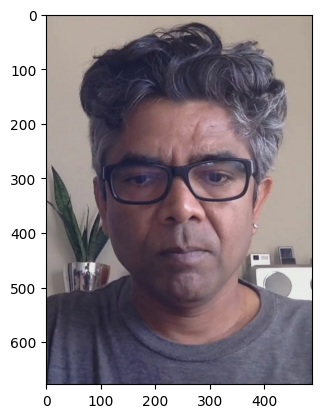

In [161]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

In [173]:
FACE_KEY = "7d68bf885954493dadd08dd44f852fe5"
FACE_ENDPOINT = "https://face-api-1920204.cognitiveservices.azure.com/"

In [163]:
!ls avkash*.png

avkash.png


In [174]:
face_client = FaceClient(FACE_ENDPOINT, CognitiveServicesCredentials(FACE_KEY))

In [165]:
face_client.api_version

'1.0'

In [166]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-avkash'

In [175]:
## This code is taken from Azure Face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    human_person = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg human images in working directory.
    human_face_images = [file for file in glob.glob('*.png') if file.startswith("avkash")]
    # Add images to a Person object
    for image_p in human_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, human_person.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)


In [181]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: 67893364-935a-4fb7-8991-7d246616682a


APIErrorException: (InvalidRequest) Invalid request has been sent.